# Dropbox-To-Pinecone Connector API Quickstart for Unstructured

[Unstructured](https://unstructured.io) provides a platform and tools to ingest and process unstructured and semi-structured documents and data for retrieval-augmented generation (RAG), agentic AI, and model fine-tuning.

Unstructured can connect to several types of [sources](https://docs.unstructured.io/api-reference/workflow/sources/overview) that contain your organization's documents and data&mdash;and [destinations](https://docs.unstructured.io/api-reference/workflow/destinations/overview) that Unstructured can send its structured representations of these documents and data to.

In this quickstart, you use the [Unstructured Workflow Endpoint](https://docs.unstructured.io/api-reference/workflow/overview) to programmatically create a [Dropbox source connector](https://docs.unstructured.io/api-reference/workflow/sources/dropbox) and a [Pinecone destination connector](https://docs.unstructured.io/api-reference/workflow/destinations/pinecone) in your Unstructured account. You then programmatically add these connectors to a [workflow](https://docs.unstructured.io/api-reference/workflow/workflows) in your Unstructured account, run that workflow as a [job](https://docs.unstructured.io/api-reference/workflow/jobs), and then explore the job's results.

This source connector enables your workflows to process your files that you store in a Dropbox account. This destination connector enables your workflows to send processed data about your documents into a [Pinecone dense serverless index](https://docs.pinecone.io/guides/index-data/indexing-overview#dense-indexes) in your Pinecone account.

In this quickstart, you will use this notebook to:

👉 1. Create a free Dropbox Basic account.<br/>
👉 2. Create a Dropbox app in your Dropbox account. This app will provide the connection between your Dropbox account and your Unstructured account.<br/>
👉 3. Get a refresh token for your Dropbox app.<br/>
👉 4. Upload your unstructured documents, semi-structured documents, or both to your Dropbox account.<br/>
👉 5. Create a Dropbox source connector in your Unstructured account.<br/>
👉 6. Create a free Pinecone account.<br/>
👉 7. Create a Pinecone destination connector in your Unstructured account.<br/>
👉 8. Create a workflow in your Unstructured account, adding the Dropbox source connector and Pinecone destination connector to this workflow.<br/>
👉 9. Run the workflow as a job.<br/>
👉 10. Poll for the job's completion.<br/>
👉 11. Explore the job's results in your Pinecone account.<br/>

At the end of this notebook, you will have an end-to-end solution that allows Unstructured to feed your organization's documents into a [vector database](https://www.pinecone.io/learn/vector-database/), suitable for powering your chatbots and other [retrieval-augmented generation (RAG)](https://www.pinecone.io/solutions/rag/) solutions.   

❓ *If you are not able to complete any of the following steps, contact Unstructured Support at [support@unstructured.io](mailto:support@unstructured.io).*

## Step 1: Create your Dropbox account

In this step, you create a [free Dropbox Basic account](https://www.dropbox.com/basic). This account is limited to a single user and 2 GB of storage.
If you already have a Dropbox account and want to use it instead, then skip ahead to **Step 2**.

👉 1. On a separate tab in your web browser, go to the Dropbox account sign up page, at https://www.dropbox.com/register.<br/>
👉 2. Enter your email address, and then click **Continue**.<br/>
👉 3. Enter your name and then, for **Password**, enter some password for your new account. Be sure to save this password to some secure location, as you will need it to access your Dropbox account later.<br/>
👉 4. Click **Agree and sign up**.<br/>
👉 5. To create a Dropbox Basic account, click the **Personal** tile.<br/>
👉 6. When you are prompted to install the Dropbox desktop app or mobile app, click **Skip step**. (You can always install these apps later.)<br/>
👉 7. To create a Dropbox Basic account, click **Continue with 2 GB Dropbox Basic plan** at the bottom of the account type selection page.<br/>
👉 8. You are automatically signed in to your new Dropbox Basic account, and the Dropbox user interface (UI) appears.<br/>

---

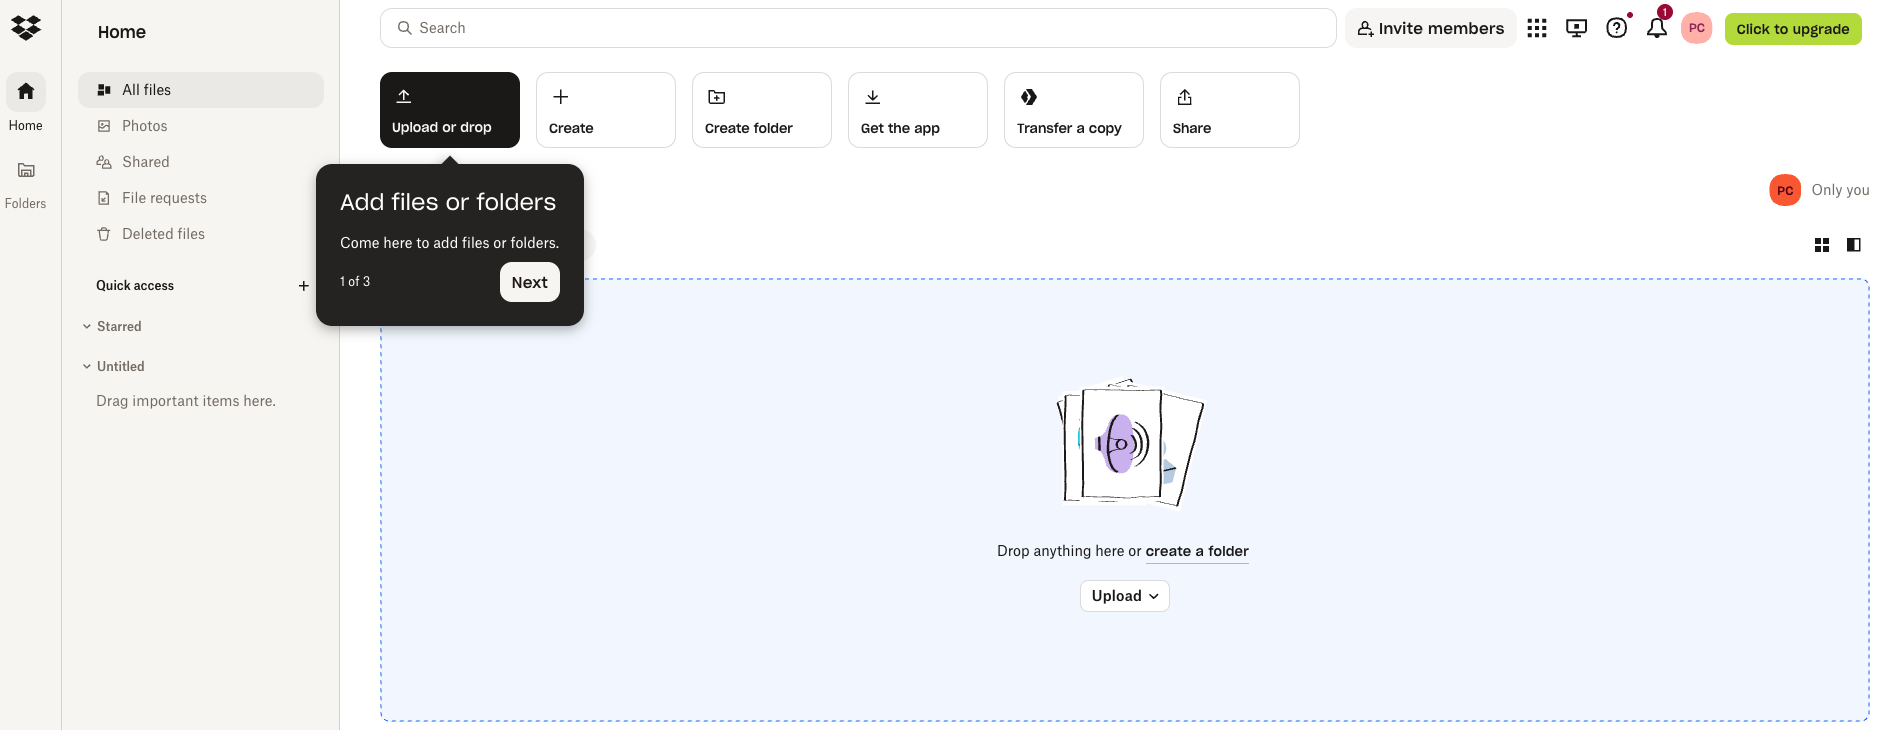

## Step 2: Create a Dropbox app

In this step, you create a Dropbox app in your Dropbox account. Unstructured will use this app to access your Dropbox account.

👉  1. On a separate tab in your web browser, open the Dropbox Developers page, at https://www.dropbox.com/developers.<br/>
👉 2. Click **Create apps**.<br/>

---

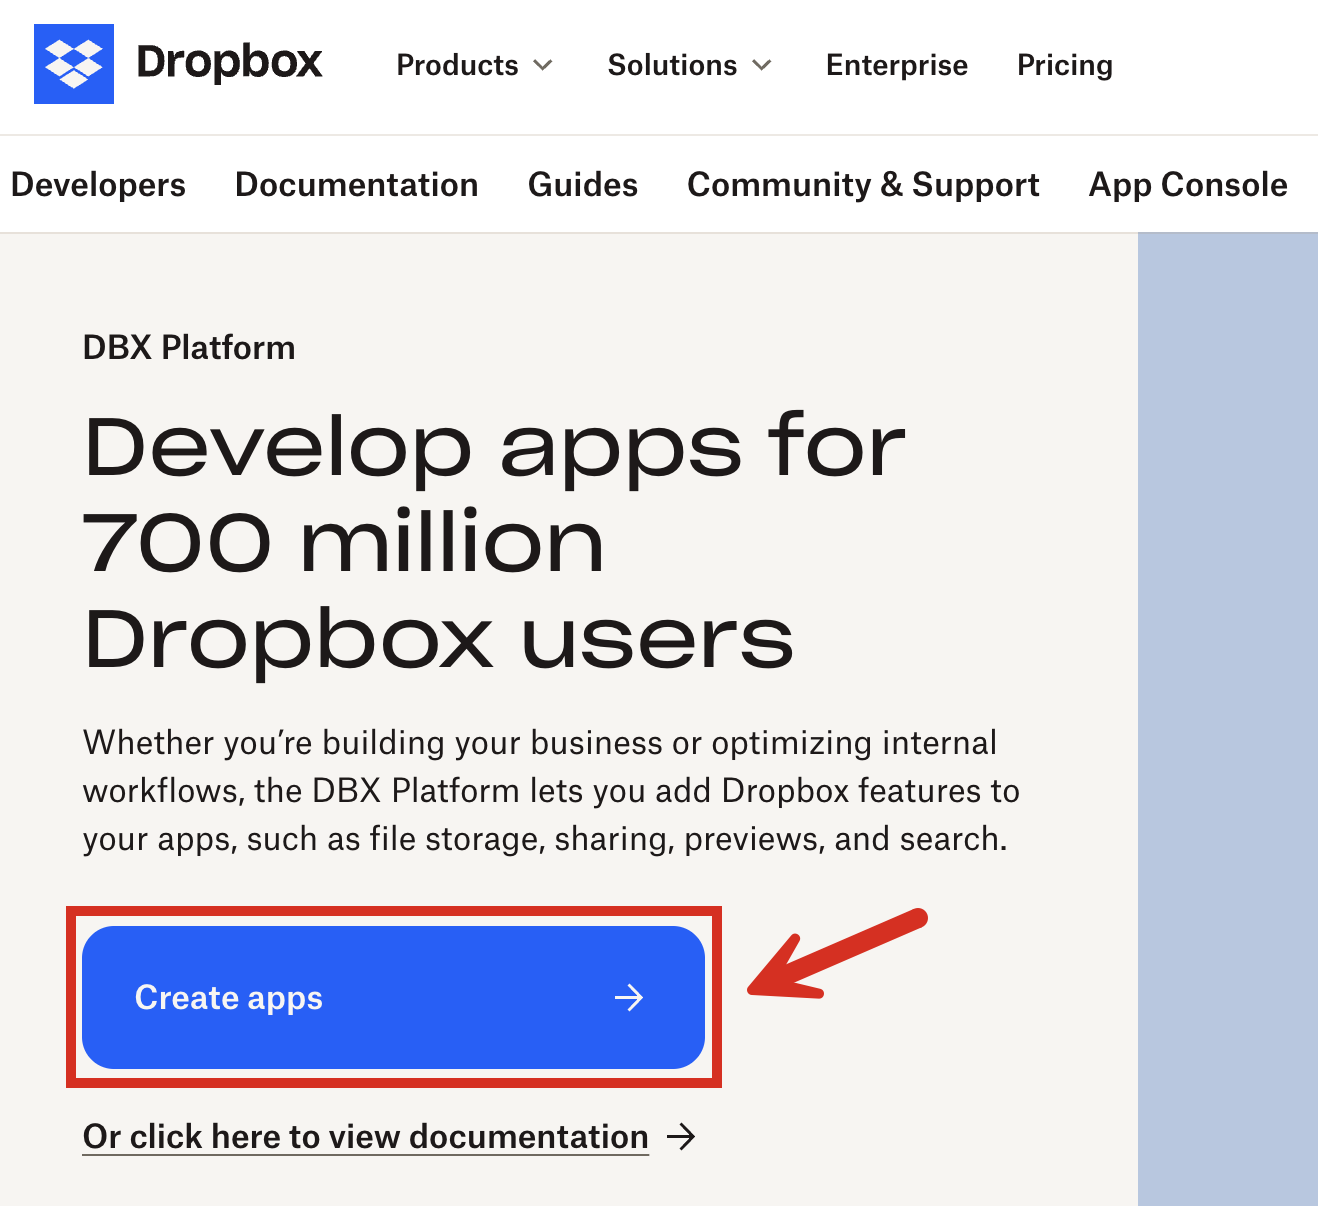

---

👉 3. For **Choose an API**, select the **Scoped access** radio button.<br/>
👉 4. For **Choose the type of access you need**, select the **App folder** radio button.<br/>
👉 5. For **Name your app**, enter some name for your Dropbox app.<br/>
👉 6. Check the box labelled **I agree to Dropbox API Terms and Conditions**, if it appears.<br/>
👉 7. Click **Create app**.<br/>

---

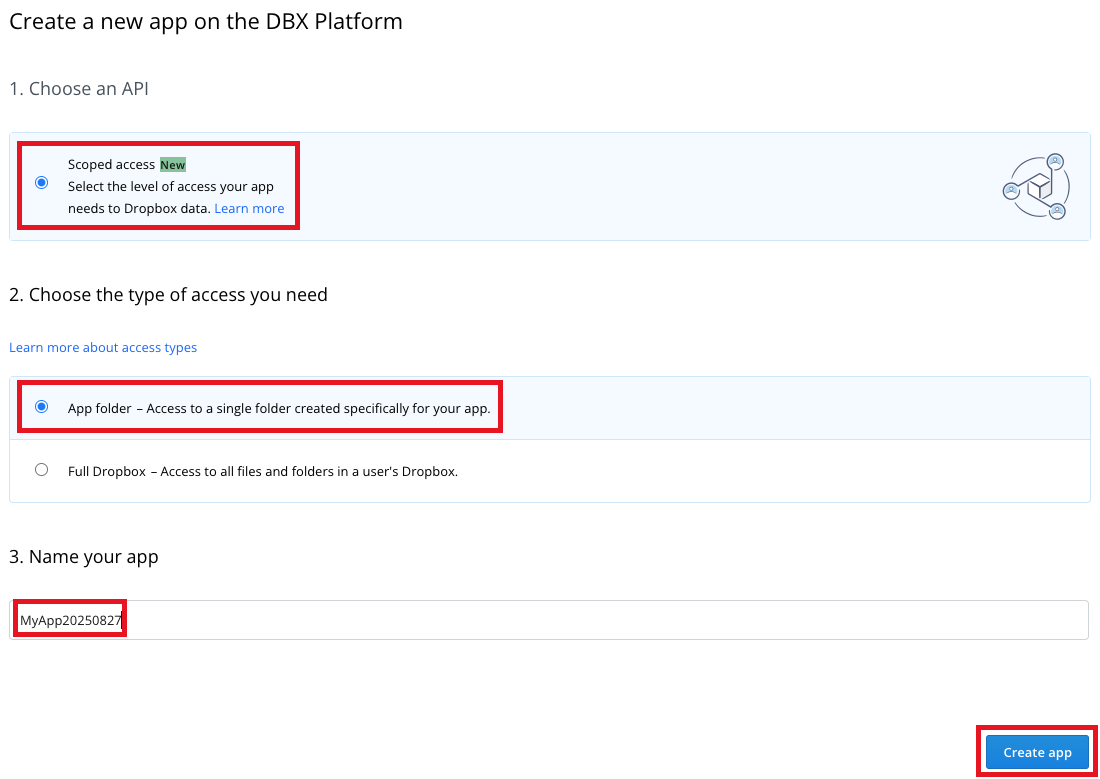

---

👉 8. On the Dropbox app's **Permissions** tab, under **Files and folders**, check the box labelled **files.content.read**, and then click **Submit**.<br/>

---

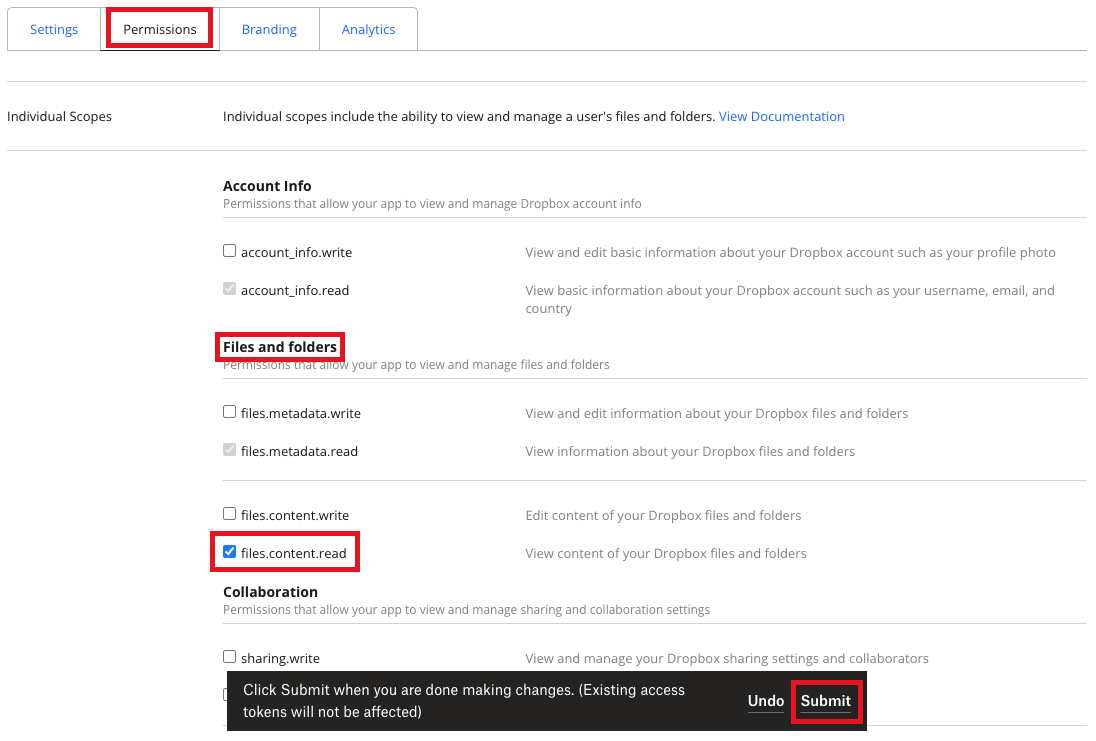

---

👉 9. On the app's **Settings** tab, note the value of the **App folder name** field. This is the name of the subfolder that Dropbox will create under the `Apps` top-level folder in your Dropbox account. Your new Dropbox app will use this subfolder for access.<br/>

---

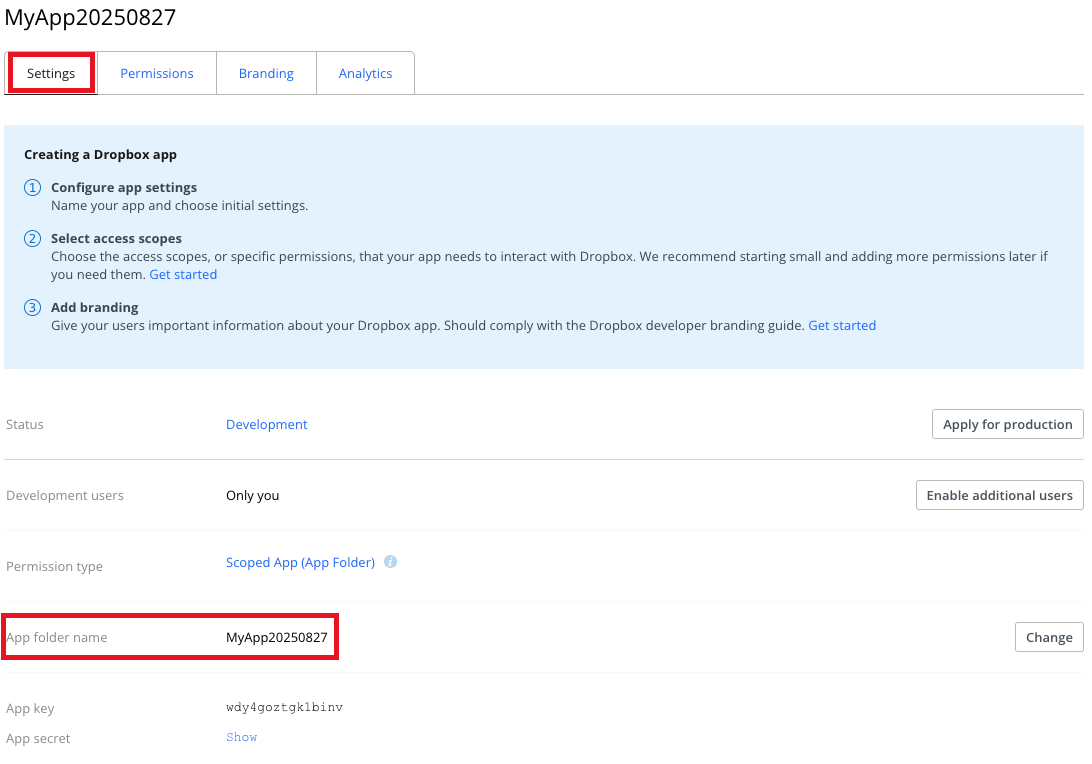

---

👉 10. With the app's **Settings** tab still showing, scroll down to **App key**.<br/>
👉 11. Next to **App secret**, click **Show**.<br/>

---

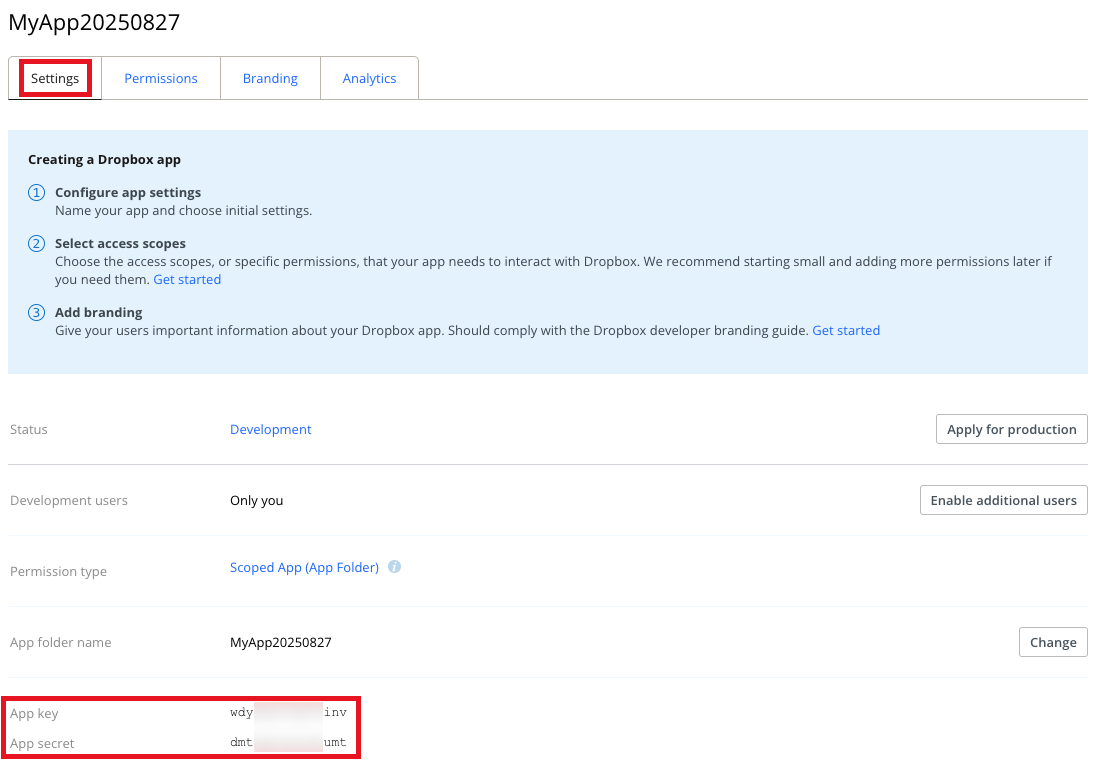

---

👉 12. In the following cell, replace `<your-dropbox-app-key>` with your **App key** value, and replace `<your-dropbox-app-secret>` with your **App secret** value. Then run the cell, which sets the constants `DROPBOX_APP_KEY` and `DROPBOX_APP_SECRET` to your app's key and secret values, respectively.

⚠ *In a production environment, you should set constants with sensitive values such as these as environment variables outside of this notebook and then reference those external variables here and thoughout. This can help prevent you from accidentally checking in source code that contains such sensitive values.*

In [1]:
DROPBOX_APP_KEY    = "<your-dropbox-app-key>"
DROPBOX_APP_SECRET = "<your-dropbox-app-secret>"

## Step 3: Get a refresh token for your Dropbox app

In this step, you get a refresh token for your Dropbox app. Unstructured needs this refresh token, along with the **App key** and **App secret** from the previous step, to be able to use your Dropbox app to connect to your Dropbox account.

👉 1. On a separate tab in your web browser, enter the following address. In this address, replace `<your-dropbox-app-key>` with the **App key** you noted in **Step 2**:

   ```https://www.dropbox.com/oauth2/authorize?client_id=<your-dropbox-app-key>&response_type=code&token_access_type=offline```

   For example, if your **App key** is `aaa1aaaaaa1aaaa`, then your address should look like this:

   ```https://www.dropbox.com/oauth2/authorize?client_id=aaa1aaaaaa1aaaa&response_type=code&token_access_type=offline```

👉 2. Click **Continue**.

---

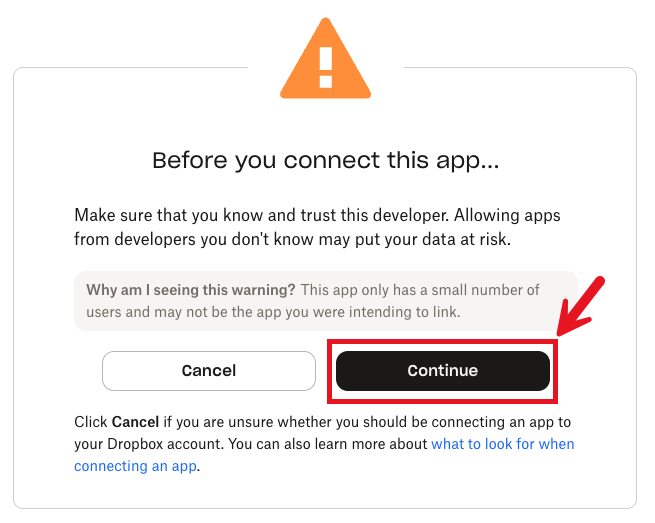

---

👉 3. Click **Allow**.

---

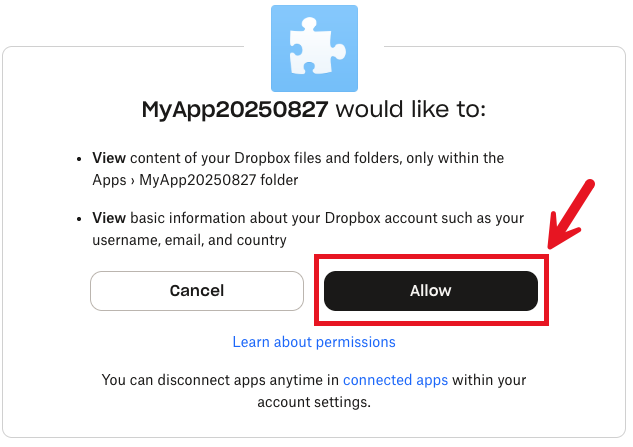

---

👉 4. Note the value in the **Access Code Generated** box.

---

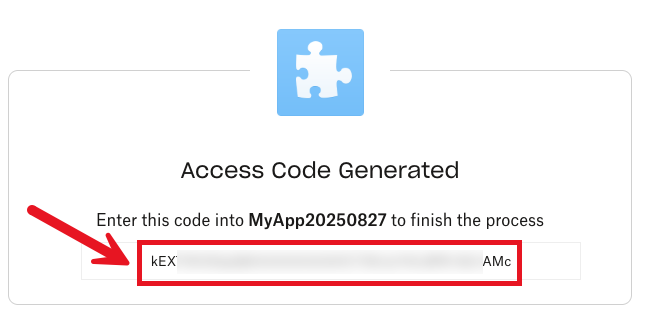

---

💡 *This same access code value also appears in the `auth_code` parameter from the address bar. For example, if the address bar shows this:*

https://www.dropbox.com/oauth2/authorize_success?auth_code=ccc1ccc1ccc1-1cc-1cc&client_id=aaa1aaaaaa1aaaa&version=1


*Then the auth_code value is ccc1ccc1ccc1-1cc-1cc.*

👉 5. In the following cell, replace `<your-access-code>` with your **Access Code Generated** value or `auth_code` parameter value. Then run the cell, which sets the constant `DROPBOX_APP_ACCESS_CODE` to your access/auth code.

In [2]:
DROPBOX_APP_ACCESS_CODE = "<your-access-code>"

👉 6. Run the following cell to install the `requests` Python library. This library is required for making HTTP requests from this notebook to various third-party services, such as to Dropbox.

In [3]:
!pip install requests

👉  7. Run the following cell, which gets the refresh token for your Dropbox app and then sets the constant `DROPBOX_APP_REFRESH_TOKEN` to this refresh token's value. The cell also displays the refresh token here for reference.

In [ ]:
import requests

url = 'https://api.dropbox.com/oauth2/token'

data = {
    'code': DROPBOX_APP_ACCESS_CODE,
    'grant_type': 'authorization_code'
}

headers = {
    'Content-Type': 'application/x-www-form-urlencoded'
}

response = requests.post(
    url,
    headers=headers,
    data=data,
    auth=(DROPBOX_APP_KEY, DROPBOX_APP_SECRET)
)

response.raise_for_status()

DROPBOX_APP_REFRESH_TOKEN = response.json()['refresh_token']

print("Dropbox app refresh token:\n---\n", DROPBOX_APP_REFRESH_TOKEN)

## Step 4: Upload documents to your Dropbox app folder

In this step, you add your documents to your Dropbox app folder in your Dropbox account. [See the list of files types that Unstructured supports](https://docs.unstructured.io/api-reference/supported-file-types).

👉 1. In the Dropbox UI from **Step 1**, expand **Apps**, and then click the folder that matches the **App folder name** field you noted in **Step 2**.<br/>

---

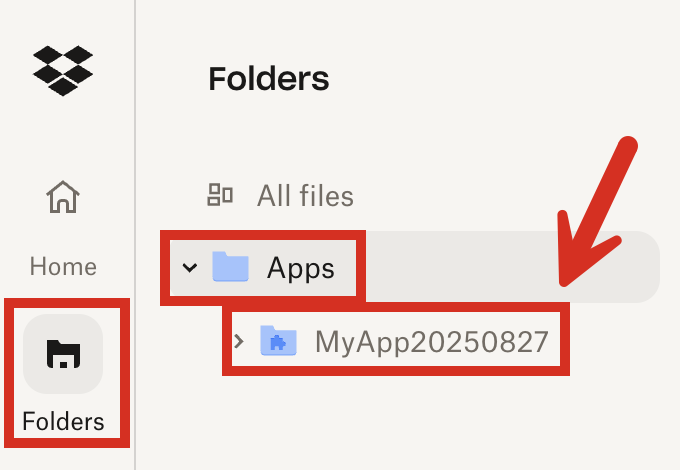

---

💡 *If the `Apps` folder is not clickable, or if Dropbox reports that the folder is not found, then try refreshing the page and clicking the `Apps` folder again.*

👉 2. Click **Create folder**.<br/>

---

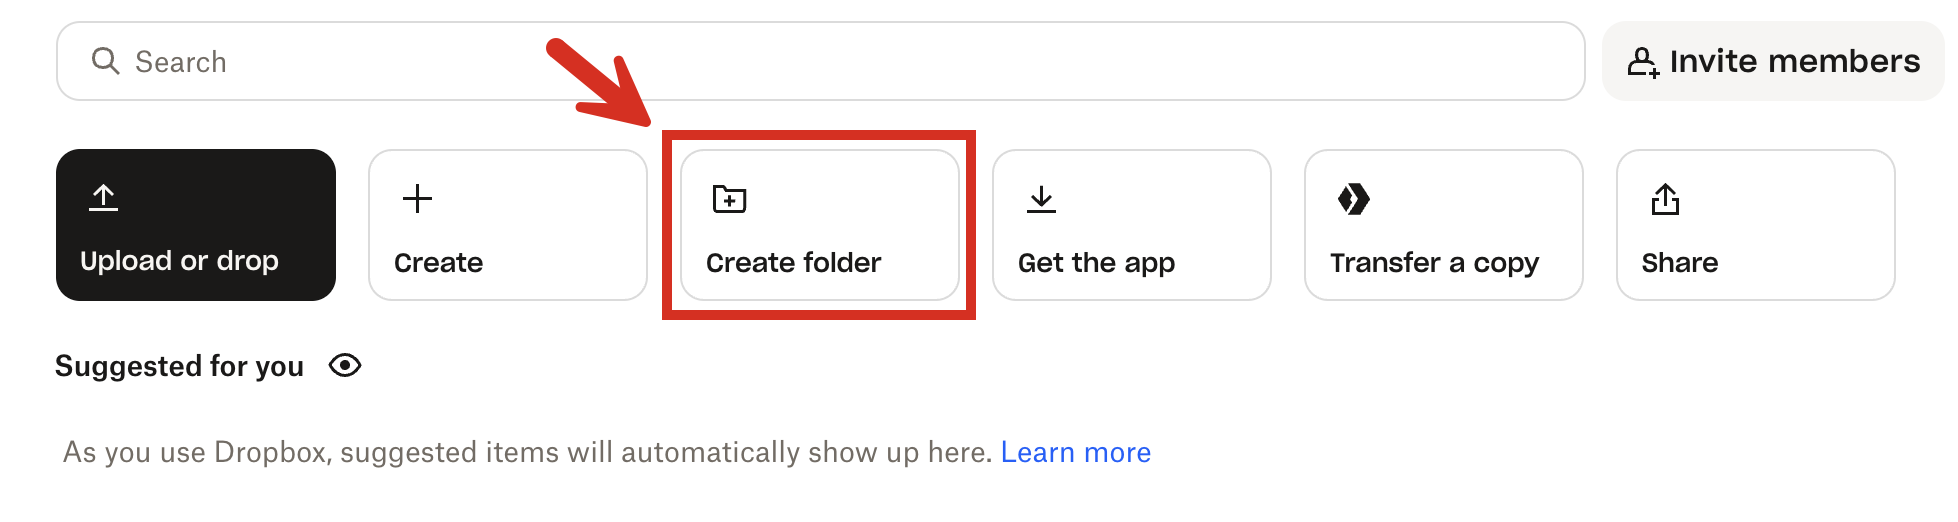

---

👉 3. Give the subfolder a name, and then click **Create**.<br/>

---

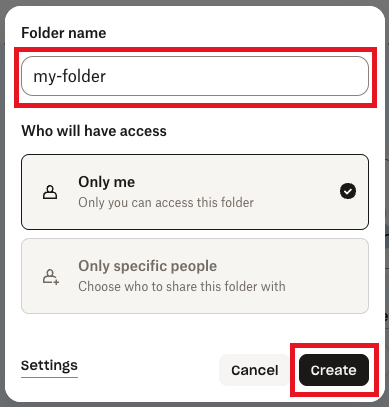

---

👉 4. Click **Upload or drop** (or **Upload > Files** or **Upload > Folder**), and then follow the on-screen instructions to upload some documents to this subfolder in your Dropbox app folder. For a Dropbox Basic account, the total size of all of the files you upload and store in your Dropbox account (not just this subfolder) cannot exceed 2 GB.<br/>

---

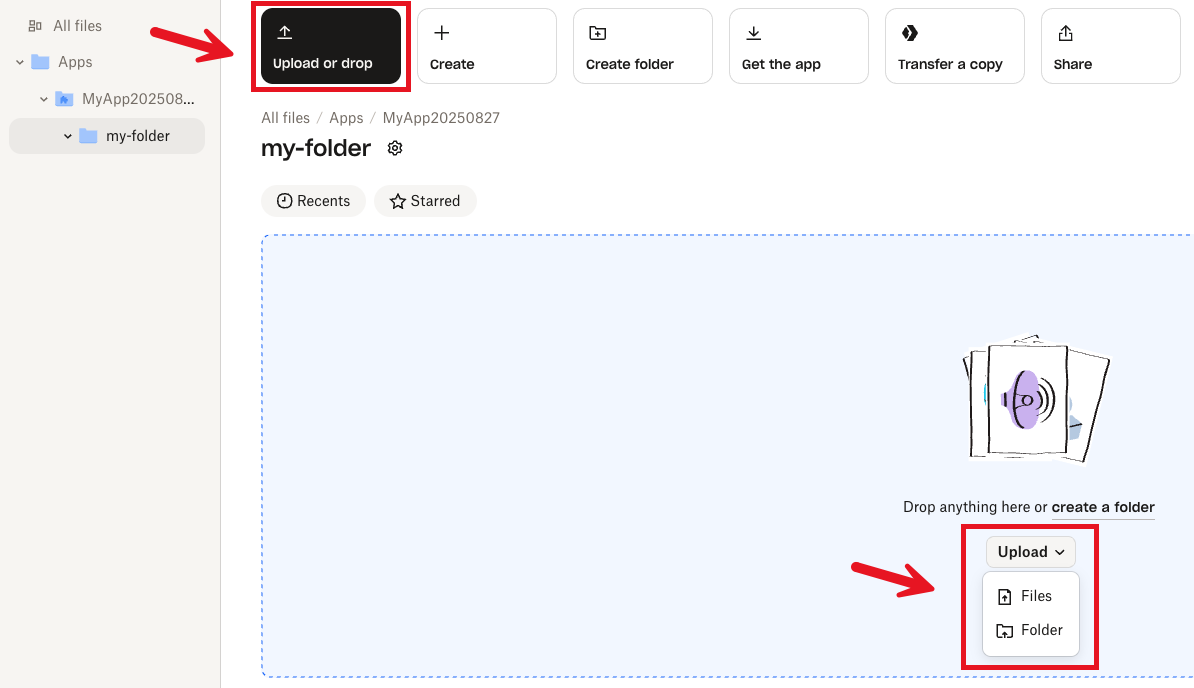

---

## Step 5: Create the Dropbox source connector

In this step, you create a Dropbox source connector in your Unstructured account. This source connector is used by Unstructured to connect to your Dropbox account and then process the documents in the specified folder.

Before you can create this connector, you must create and then set the API key for your Unstructured account. This step begins with creating and then setting this key.

👉 1. If you do not already have an Unstructured account, on a separate tab in your web browser, [sign up for free](https://unstructured.io/?modal=try-for-free). After you sign up, you are automatically signed in to your new Unstructured **Starter** account, at https://platform.unstructured.io.

💡 *To sign up for a **Team** or **Enterprise** account instead, [contact Unstructured Sales](https://unstructured.io/?modal=contact-sales), or [learn more](https://docs.unstructured.io/ui/overview#how-am-i-billed%3F).*

👉 2. If you have an Unstructured **Starter** or **Team** account and are not already signed in, on a separate tab in your web browser, sign in to your account at https://platform.unstructured.io.

💡 *For an **Enterprise** account, see your Unstructured account administrator for instructions, or email Unstructured Support at [support@unstructured.io](mailto:support@unstructured.io).*

👉 3. On the sidebar, click **API Keys**.

👉 4. Click **Generate New Key +**.

👉 5. Enter some name for the new key, and then click **Continue**.

👉 6. In the list of keys, next to the key that you just created, click the **Copy** icon. The key's value is copied to your system clipboard.

💡 *If you ever lose this key, just return to this screen and click the **Copy** icon again.*

👉 7. In the following cell, replace `<your-unstructured-api-key>` with your pasted key's value and then run the cell, which sets the constant `UNSTRUCTURED_API_KEY` to your key's value.

In [5]:
UNSTRUCTURED_API_KEY = "<your-unstructured-api-key>"

👉 8. Run the following cell, which installs the `unstructured-client` and `datetime` libraries. These libraries are required for making HTTP requests to the Unstructured Workflow Endpoint and for assigning unique asset names in this example, respectively.

In [6]:
!pip install -U unstructured-client datetime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.8/207.8 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.5/310.5 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.7/264.7 kB 20.4 MB/s eta 0:00:00


👉 9. In the following cell, replace `<your-dropbox-app-subfolder-path>` with the name of the subfolder you created earlier in **Step 4**, for example `my-folder`. Then run the cell, which sets the constant `DROPBOX_APP_SUBFOLDER_PATH` to this subfolder's path.

In [7]:
DROPBOX_APP_SUBFOLDER_PATH = "<your-dropbox-app-subfolder-path>"

👉 10. Run the following cell, which creates the Dropbox source connector and sets the constant `DROPBOX_SOURCE_CONNECTOR_ID` to the new connector's unique ID. This cell also displays the new connector's settings here for reference.

In [8]:
from datetime import datetime

from unstructured_client import UnstructuredClient
from unstructured_client.models.operations import CreateSourceRequest
from unstructured_client.models.shared import CreateSourceConnector

with UnstructuredClient(api_key_auth=UNSTRUCTURED_API_KEY) as client:
    response = client.sources.create_source(
        request=CreateSourceRequest(
            create_source_connector=CreateSourceConnector(
                name=f"dropbox-source-{datetime.now().strftime("%Y-%m-%d-%H-%M-%S")}",
                type="dropbox",
                config={
                    "remote_url": f"dropbox://{DROPBOX_APP_SUBFOLDER_PATH}",
                    "recursive": True,
                    "token": DROPBOX_APP_REFRESH_TOKEN,
                    "app_key": DROPBOX_APP_KEY,
                    "app_secret": DROPBOX_APP_SECRET
                }
            )
        )
    )

    print(f"Dropbox source connector settings:\n---\n{response.source_connector_information.model_dump_json(indent=4)}")

    DROPBOX_SOURCE_CONNECTOR_ID = response.source_connector_information.id

/usr/local/lib/python3.12/dist-packages/pydantic/functional_validators.py:218: UserWarning: Pydantic serializer warnings:
  PydanticSerializationUnexpectedValue(Expected `enum` - serialized value may not be as expected [input_value='dropbox', input_type=str])
  function=lambda v, h: h(v),
/usr/local/lib/python3.12/dist-packages/pydantic/main.py:463: UserWarning: Pydantic serializer warnings:
  PydanticSerializationUnexpectedValue(Expected `enum` - serialized value may not be as expected [input_value='dropbox', input_type=str])
  return self.__pydantic_serializer__.to_python(


Dropbox source connector settings:
---
{
    "config": {
        "recursive": true,
        "remote_url": "dropbox://my-folder",
        "token": "**********"
    },
    "created_at": "2025-09-10T21:32:51.247766Z",
    "id": "7cf30ead-cf54-479f-a897-b5fbe8790b76",
    "name": "dropbox-source-2025-09-10-21-32-51",
    "type": "dropbox",
    "updated_at": "2025-09-10T21:32:51.347710Z"
}


/usr/local/lib/python3.12/dist-packages/unstructured_client/models/shared/sourceconnectorinformation.py:184: UserWarning: Pydantic serializer warnings:
  PydanticSerializationUnexpectedValue(Expected `enum` - serialized value may not be as expected [input_value='dropbox', input_type=str])
  serialized = handler(self)


## Step 6: Create your Pinecone account

In this step, you create a free Pinecone Starter account. This account is limited to up to 2 users, up to 2 GB of total storage, and has rate-limited reads and writes.

If you already have a Pinecone account and want to use it instead, then skip ahead to **Step 7**.

👉 1. On a separate tab in your web browser, go to the Pinecone home page, at https://www.pinecone.io.

👉 2. Click **Sign up**.

👉 3. Enter your email address, and then click **Continue**.

👉 4. On a separate tab in your web browser, go to your email inbox, and open the email message from Pinecone. Copy the verification code that appears in this email message.

👉 5. On the tab that where you entered your email address earlier, paste the verification code into the **your code** box, and then click **Continue**.

👉 6. Select the radio button labelled **I'm building a small or personal project**, and then click **Start for free**.

👉 7. On the next page, enter the following information to continue creating your Pinecone account:

- Enter your **First Name** and **Last Name**.
- For **Purpose of use**, select **Personal**.
- For **Preferred coding language**, select **Python**.

👉 8. Click **Continue**.

👉 9. On the next page, enter the following information to finish creating your Pinecone account:

- For Use case, select **RAG**.
- For **What does your data look like**, select **I have raw documents**.
- For **What is your goal**, select **Build an AI feature/product**.

👉 10. Click **Get started**.

👉 11. In the **API key generated** dialog that appears, click the copy icon to copy your API key's value, as you will need it for **Step 7**.

---

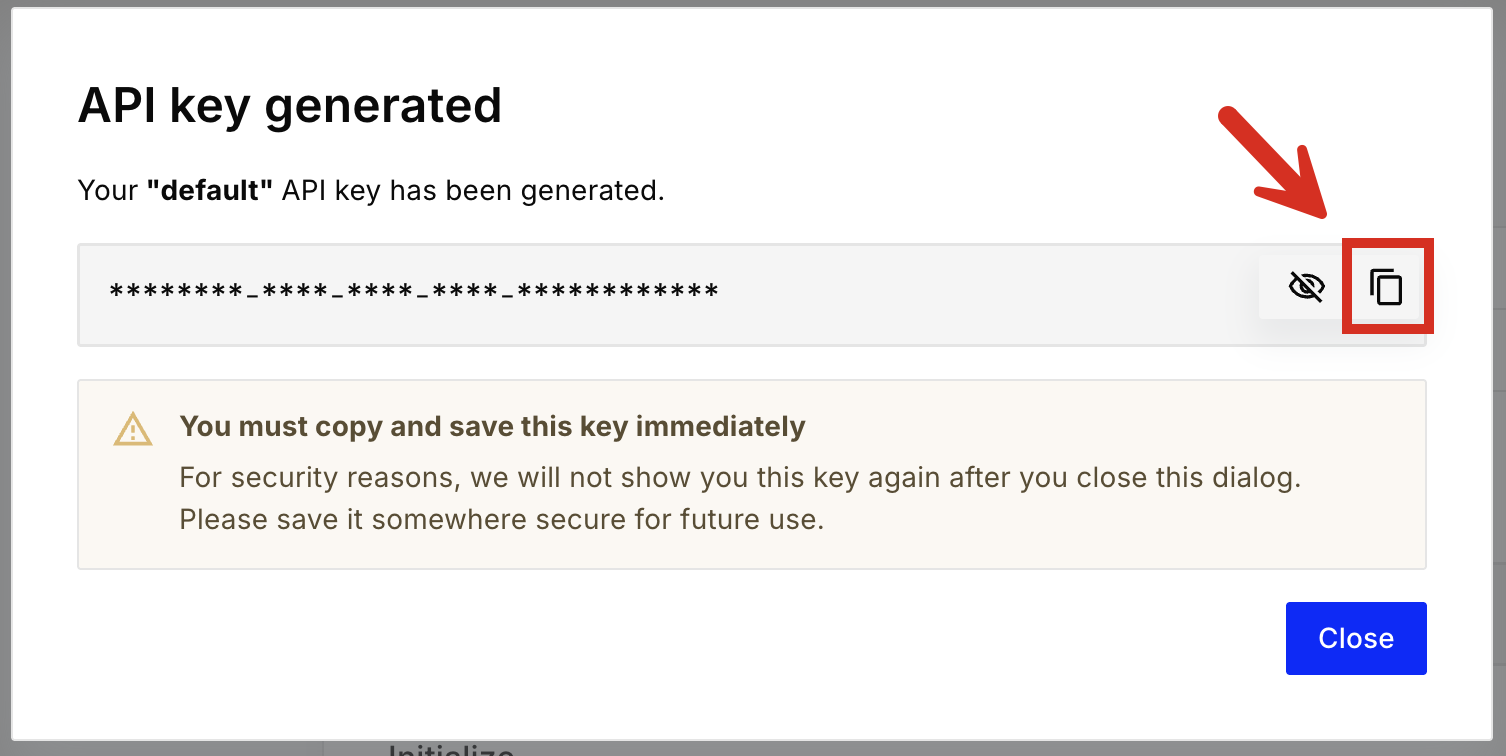

## Step 7: Create the Pinecone destination connector

In this step, you create a Pinecone destination connector in your Unstructured account. This destination connector is used by Unstructured to send processed data about your documents into a Pinecone dense serverless index in your Pinecone account. Unstructured will create this index for you in your Pinecone account. You can then use this index later as input to your RAG applications and agentic AI workflows.

👉 1. In the following cell, replace `<your-pinecone-api-key>` with the API key value for your Pinecone account and then run the cell, which sets the constant `PINECONE_API_KEY` to your key's value.

In [9]:
PINECONE_API_KEY = "<your-pinecone-api-key>"

👉 2. Run the following cell, which creates the Pinecone destination connector and sets the constant `PINECONE_DESTINATION_CONNECTOR_ID` to the new connector's unique ID. This cell also displays the new connector's settings here for reference.

In [10]:
from datetime import datetime

from unstructured_client import UnstructuredClient
from unstructured_client.models.operations import CreateDestinationRequest
from unstructured_client.models.shared import CreateDestinationConnector

with UnstructuredClient(api_key_auth=UNSTRUCTURED_API_KEY) as client:
    response = client.destinations.create_destination(
        request=CreateDestinationRequest(
            create_destination_connector=CreateDestinationConnector(
                name=f"pinecone-destination-{datetime.now().strftime("%Y-%m-%d-%H-%M-%S")}",
                type="pinecone",
                config={
                    "namespace": "default",
                    "index_name": "",
                    "api_key": PINECONE_API_KEY
                }
            )
        )
    )

    print(f"Pinecone destination connector settings:\n---\n{response.destination_connector_information.model_dump_json(indent=4)}")

    PINECONE_DESTINATION_CONNECTOR_ID = response.destination_connector_information.id

/usr/local/lib/python3.12/dist-packages/pydantic/functional_validators.py:218: UserWarning: Pydantic serializer warnings:
  PydanticSerializationUnexpectedValue(Expected `enum` - serialized value may not be as expected [input_value='pinecone', input_type=str])
  function=lambda v, h: h(v),
/usr/local/lib/python3.12/dist-packages/pydantic/main.py:463: UserWarning: Pydantic serializer warnings:
  PydanticSerializationUnexpectedValue(Expected `enum` - serialized value may not be as expected [input_value='pinecone', input_type=str])
  return self.__pydantic_serializer__.to_python(


Pinecone destination connector settings:
---
{
    "config": {
        "api_key": "**********",
        "batch_size": 50,
        "index_name": "",
        "namespace": "default"
    },
    "created_at": "2025-09-10T21:34:21.996529Z",
    "id": "72bd3dfc-fd92-401e-9c62-d8cce99d9158",
    "name": "pinecone-destination-2025-09-10-21-34-21",
    "type": "pinecone",
    "updated_at": "2025-09-10T21:34:22.094454Z"
}


/usr/local/lib/python3.12/dist-packages/unstructured_client/models/shared/destinationconnectorinformation.py:190: UserWarning: Pydantic serializer warnings:
  PydanticSerializationUnexpectedValue(Expected `enum` - serialized value may not be as expected [input_value='pinecone', input_type=str])
  serialized = handler(self)


## Step 8: Create the workflow

In this step, you create a workflow in your Unstructured account. This workflow guides Unstructured to use your Dropbox source connector to process your files and your Pinecone destination connector to send processed data about your documents into a Pinecone dense serverless index in your Pinecone account. The workflow also generates vector embeddings for the text that Unstructured detects, which Pinecone can use to power your chatbots and other retrieval-augmented generation (RAG) solutions.

To complete this step, run the following cell, which creates the workflow and sets the constant `WORKFLOW_ID` to the new workflow's unique ID. This cell also displays the new workflow's settings here for reference.

In [11]:
from datetime import datetime

from unstructured_client import UnstructuredClient
from unstructured_client.models.shared import (
    WorkflowNode,
    CreateWorkflow,
    WorkflowType
)
from unstructured_client.models.operations import CreateWorkflowRequest

with UnstructuredClient(api_key_auth=UNSTRUCTURED_API_KEY) as client:
    partition_node = WorkflowNode(
        name="Partitioner",
        subtype="vlm",
        type="partition",
        settings={
            "strategy": "auto",
            "is_dynamic": True
      }
    )

    embedder_node = WorkflowNode(
        name="Embedder",
        type="embed",
        subtype="azure_openai",
        settings={
            "model_name": "text-embedding-3-small"
        }
    )

    workflow = CreateWorkflow(
        name=f"dropbox-to-pinecone-{datetime.now().strftime("%Y-%m-%d-%H-%M-%S")}",
        source_id=DROPBOX_SOURCE_CONNECTOR_ID,
        destination_id=PINECONE_DESTINATION_CONNECTOR_ID,
        workflow_type=WorkflowType.CUSTOM,
        workflow_nodes=[
            partition_node,
            embedder_node
        ]
    )

    response = client.workflows.create_workflow(
        request=CreateWorkflowRequest(
            create_workflow=workflow
        )
    )

    print(f"Workflow details:\n---\n{response.workflow_information.model_dump_json(indent=4)}")

    WORKFLOW_ID = response.workflow_information.id

Workflow details:
---
{
    "created_at": "2025-09-10T21:34:32.387795Z",
    "destinations": [
        "72bd3dfc-fd92-401e-9c62-d8cce99d9158"
    ],
    "id": "cedc8b1f-e45a-4262-b90a-bdf5121dfc9d",
    "name": "dropbox-to-pinecone-2025-09-10-21-34-32",
    "sources": [
        "7cf30ead-cf54-479f-a897-b5fbe8790b76"
    ],
    "status": "active",
    "workflow_nodes": [
        {
            "name": "Partitioner",
            "subtype": "vlm",
            "type": "partition",
            "id": "d4d74f82-5c2d-40cd-b514-99d494d551f0",
            "settings": {
                "provider": "anthropic",
                "provider_api_key": null,
                "model": "claude-3-5-sonnet-20241022",
                "output_format": "text/html",
                "prompt": null,
                "format_html": true,
                "unique_element_ids": true,
                "is_dynamic": true,
                "allow_fast": true,
                "custom_host_config": null
            }
        }

## Step 9: Run the workflow as a job

In this step, you have Unstructured run your workflow as a job. This job performs each step in the workflow in sequential order.

To complete this step run the following cell, which begins running the workflow as a job and sets the constant `JOB_ID` to the new jobs's unique ID. This cell also displays the new jobs's settings here for reference.

In [12]:
with UnstructuredClient(api_key_auth=UNSTRUCTURED_API_KEY) as client:
    response = client.workflows.run_workflow(
        request={
            "workflow_id": WORKFLOW_ID,
        }
    )

    print(f"Job details:\n---\n{response.job_information.model_dump_json(indent=4)}")

    JOB_ID = response.job_information.id

Job details:
---
{
    "created_at": "2025-09-10T21:34:39.811955Z",
    "id": "667e4fb9-f0de-4435-b9ff-3973c6757df4",
    "status": "SCHEDULED",
    "workflow_id": "cedc8b1f-e45a-4262-b90a-bdf5121dfc9d",
    "workflow_name": "dropbox-to-pinecone-2025-09-10-21-34-32",
    "job_type": "ephemeral"
}


## Step 10: Poll for the workflow's job completion

In this step, you monitor your workflow's job progress and confirm its completion.

To complete this step, run the following cell, which lets you know how the job is progressing and when the job is completed.

Do not proceed to the next step until you see the message `Job is completed`.

In [13]:
import time

def poll_job_status(client, job_id):
    while True:
        response = client.jobs.get_job(
            request={
                "job_id": job_id
            }
        )

        job = response.job_information

        if job.status == "SCHEDULED":
            print("Job is scheduled, polling again in 10 seconds...")
            time.sleep(10)
        elif job.status == "IN_PROGRESS":
            print("Job is in progress, polling again in 10 seconds...")
            time.sleep(10)
        else:
            print("Job is completed")
            break

    return job

with UnstructuredClient(api_key_auth=UNSTRUCTURED_API_KEY) as client:
    job = poll_job_status(client, JOB_ID)
    print(f"Job details:\n---\n{job.model_dump_json(indent=4)}")

Job is scheduled, polling again in 10 seconds...
Job is in progress, polling again in 10 seconds...
Job is in progress, polling again in 10 seconds...
Job is in progress, polling again in 10 seconds...
Job is in progress, polling again in 10 seconds...
Job is in progress, polling again in 10 seconds...
Job is in progress, polling again in 10 seconds...
Job is in progress, polling again in 10 seconds...
Job is completed
Job details:
---
{
    "created_at": "2025-09-10T21:34:39.811955",
    "id": "667e4fb9-f0de-4435-b9ff-3973c6757df4",
    "status": "COMPLETED",
    "workflow_id": "cedc8b1f-e45a-4262-b90a-bdf5121dfc9d",
    "workflow_name": "dropbox-to-pinecone-2025-09-10-21-34-32",
    "job_type": "ephemeral",
    "runtime": "PT0S"
}


## Step 11: Check the workflow's job results

In this step, you explore the Pinecone dense serverless index in your Pinecone account. Unstructured fills this serverless index with structured representations of the documents in your Dropbox account.

👉 1. On a separate tab in your web browser, log in to your Pinecone account, if you are not already logged in. To do this, go to https://pinecone.io, click **Log in**, and follow the on-screen instructions to finish logging in.

👉 2. On the sidebar, under **Database**, click **Indexes**.

---

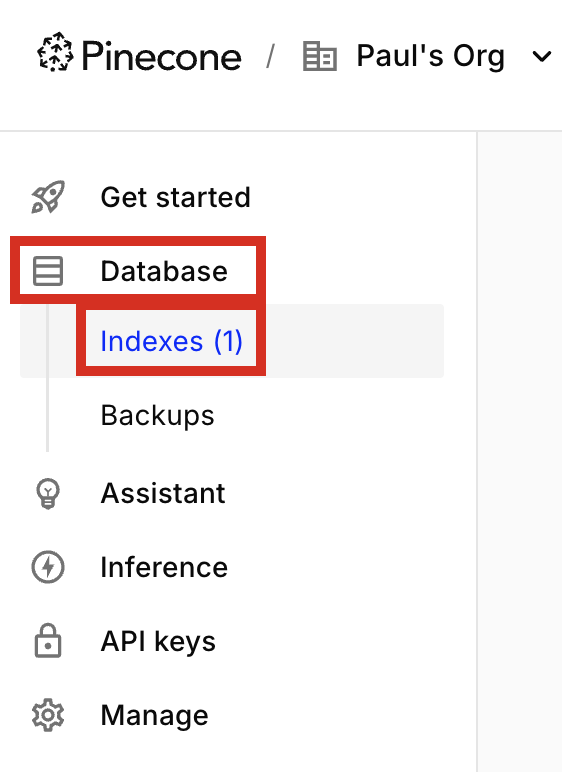

---

👉 3. Click the name of the index that Unstructured created. The name should look like this: `u<random-number>-textembedding3-small-1536`.

---

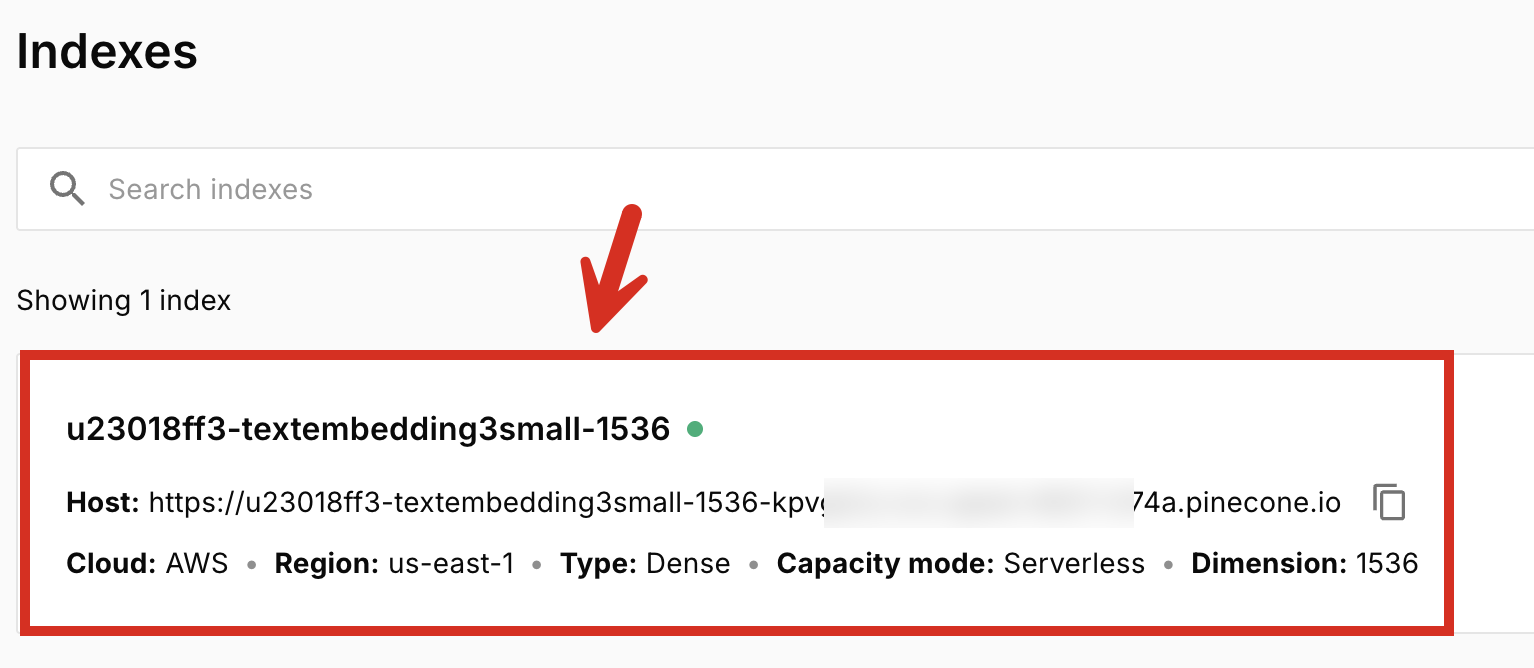

---

👉 4. On the **Browser** tab, click **List/Fetch**.

👉 5. For **Namespace**, select **default**.

👉 6. For **Operation**, select **List IDs**.

👉 7. For **Limit**, enter `10`.

👉 8. Click **List**.

---

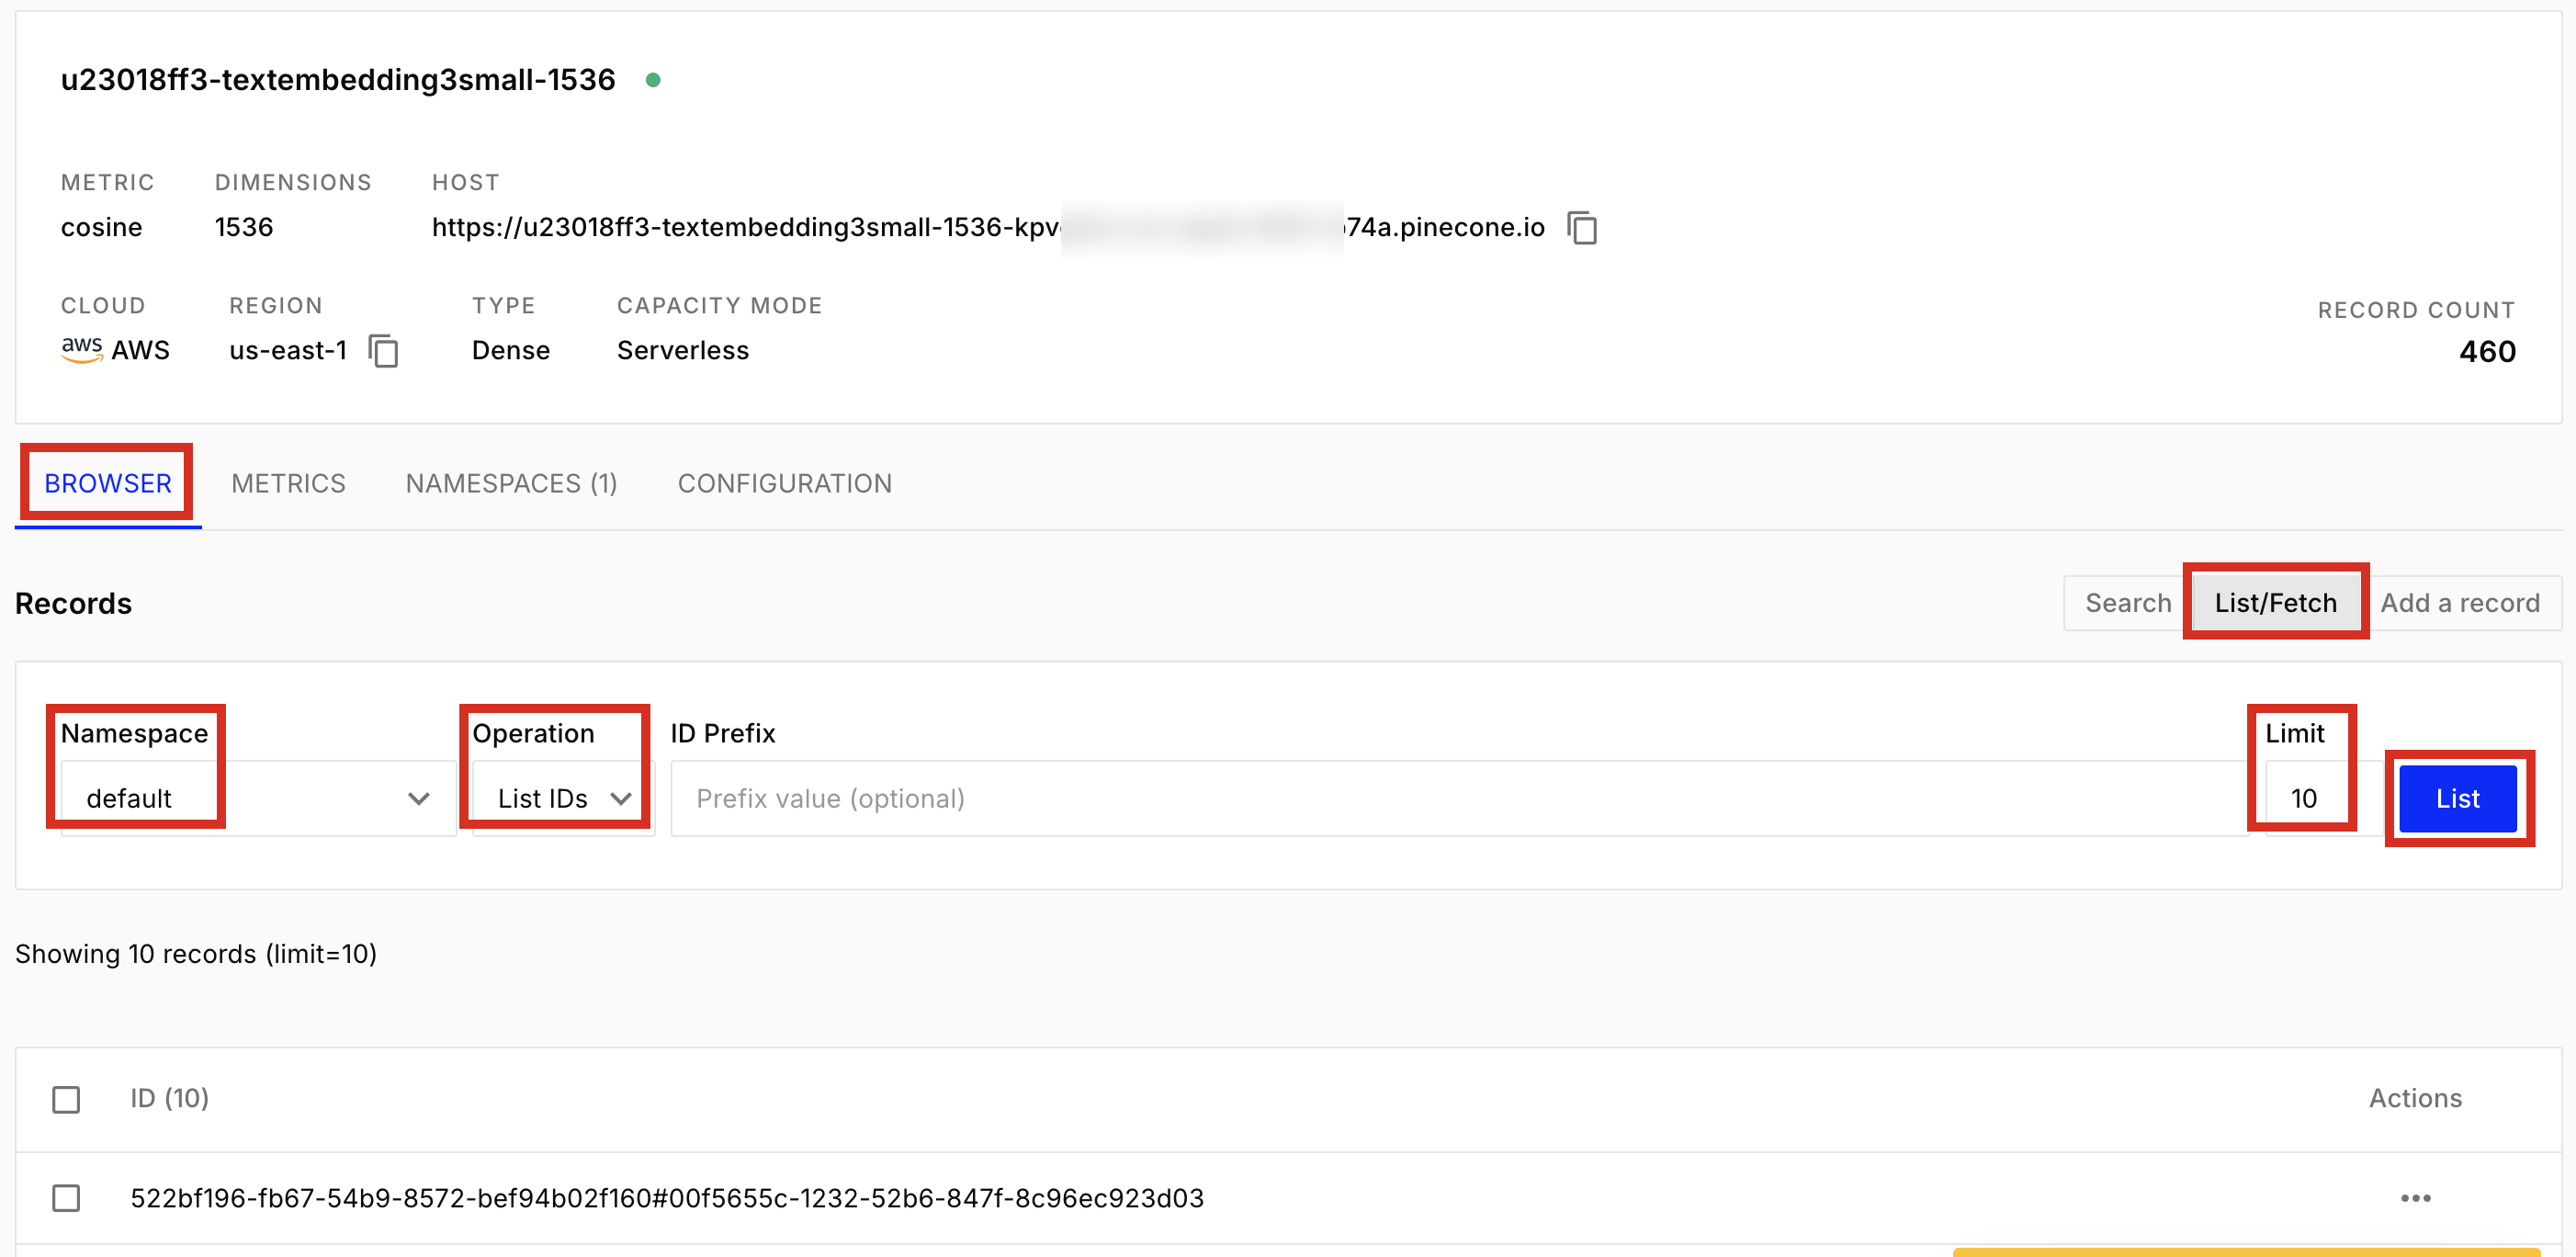

---

👉 9. To look at the data and metadata for any of the records that are in the list, click the ellipsis (three dots) icon, and then click **Fetch**.

---

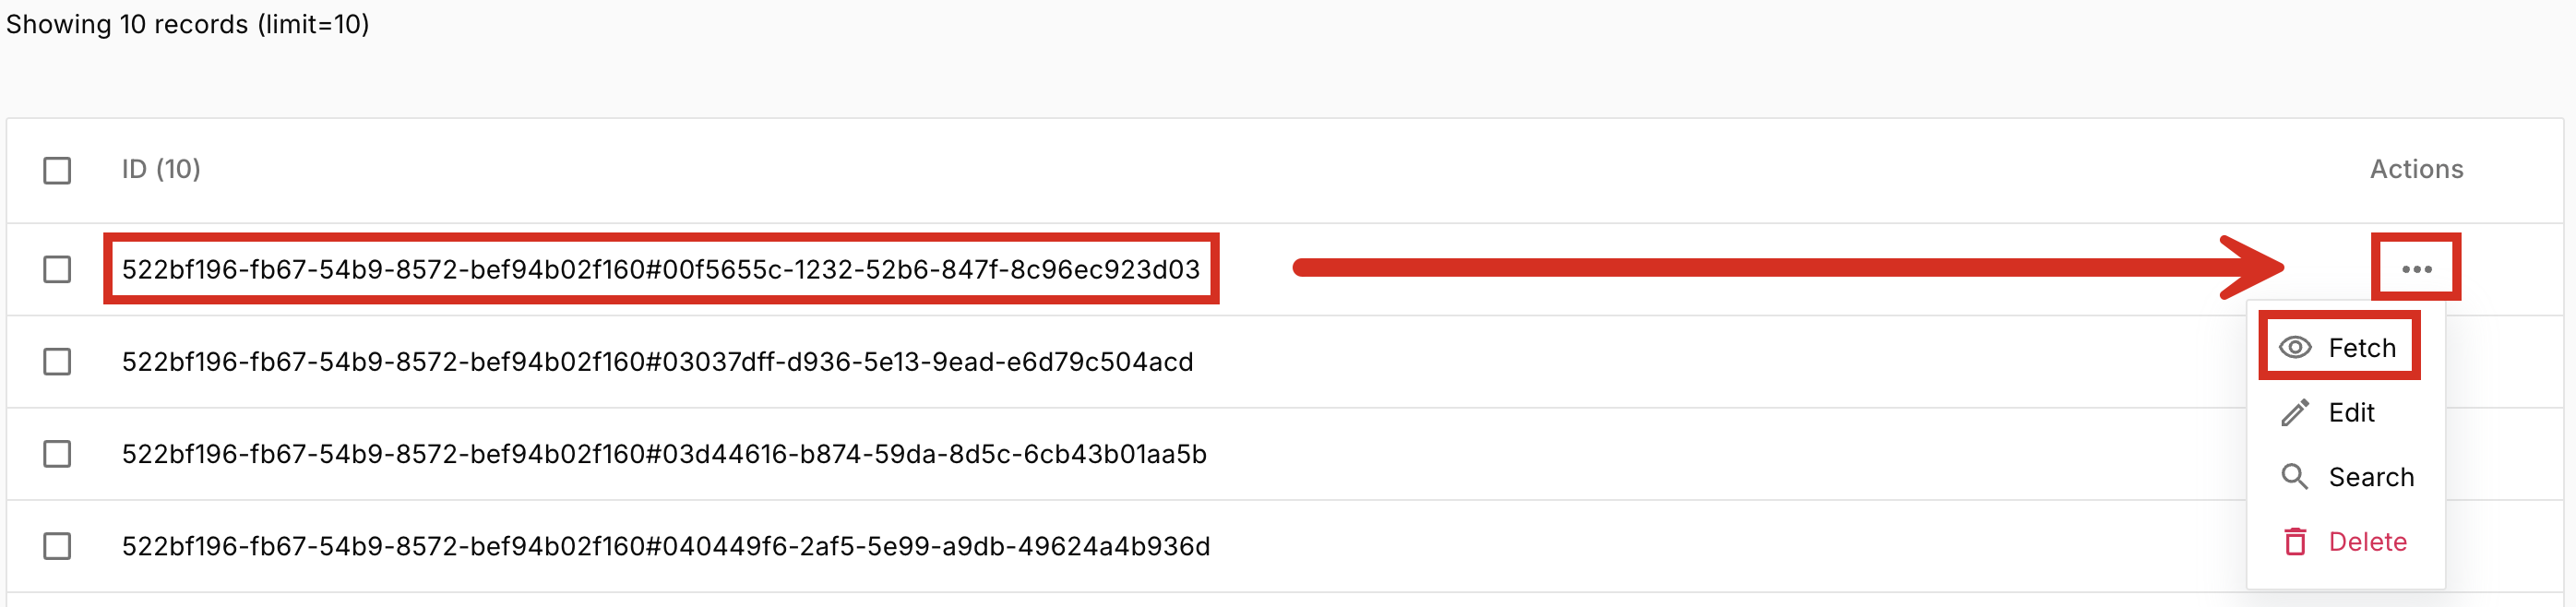

---

👉 10. When you are done looking at the record, click **Close**.

---

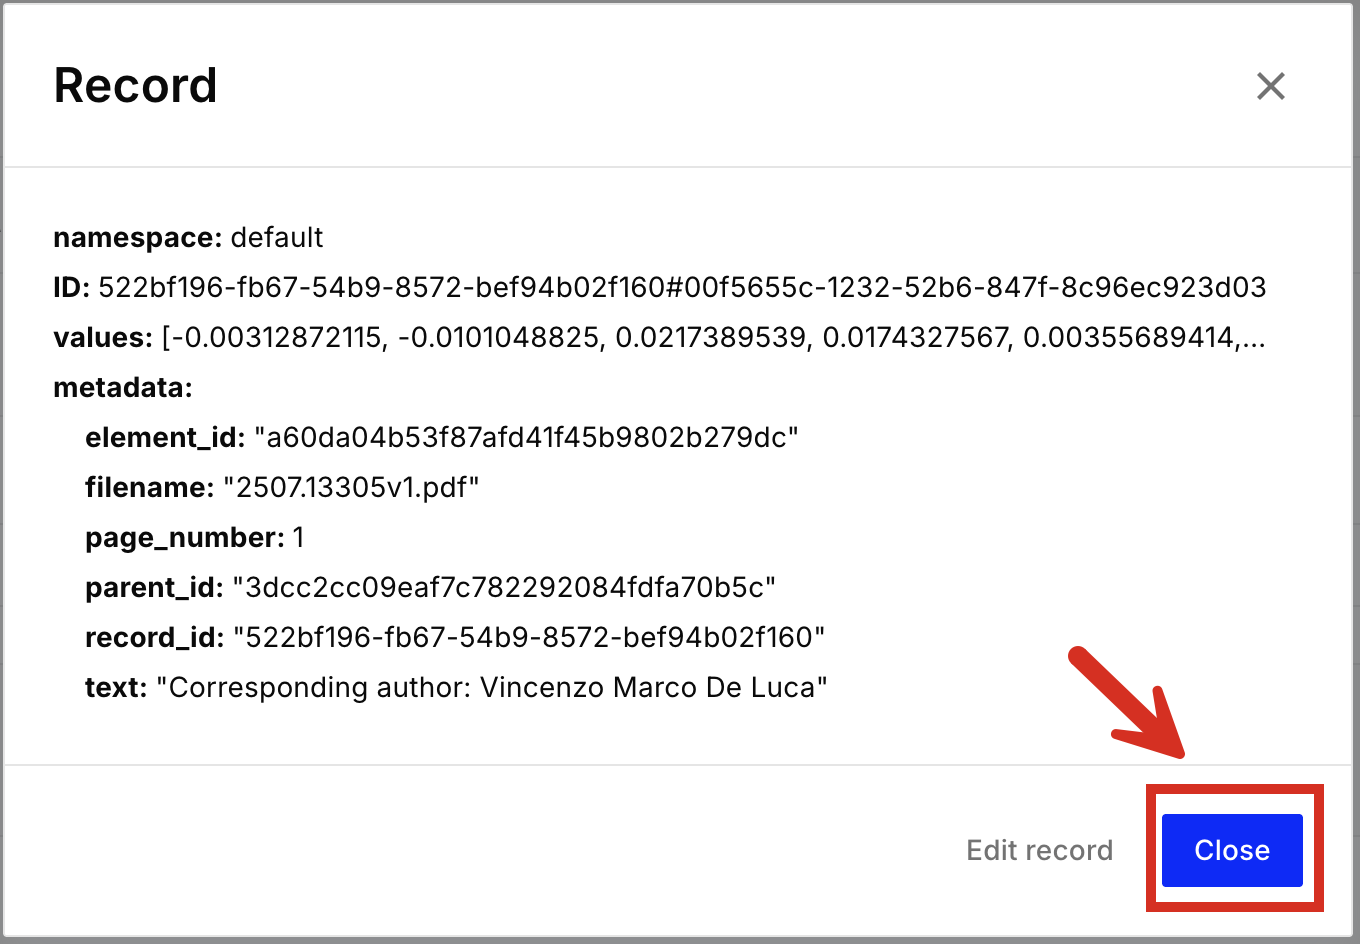

---

👉 11. To learn how to use this Pinecone index as input to your RAG applications and agentic AI workflows, see resources such as the following:

- [Semantic search](https://docs.pinecone.io/guides/search/semantic-search) in the Pinecone documentation
- [Filter by metadata](https://docs.pinecone.io/guides/search/filter-by-metadata) in the Pinecone documentation
- [Rerank results](https://docs.pinecone.io/guides/search/rerank-results) in the Pinecone documentation
- [Build a RAG chatbot](https://docs.pinecone.io/guides/get-started/build-a-rag-chatbot) in the Pinecone documentation
- [Pinecone integration](https://python.langchain.com/docs/integrations/vectorstores/pinecone/) with LangChain on the LangChain website